# Random Forest and Decision Tree Practice Project 

Data collected from [LendingClub.com](www.lendingclub.com). 
This model has the purpose of evaluating the likelihood that someone who borrows money will pay you back, given their profile by using lending data from 2007-2010.
 
Data can be downloaded from [here](https://www.lendingclub.com/info/download-data.action) -> Download .csv provided version.

Column data:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


### Credit for the Project Ideation
Jose Portilla, from [PierianData.com](http://www.pieriandata.com).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analysing the Structure of the Dataframe

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

FICO distributions for the different credit policy outcomes (representing the fitness to Lending.com's credit underwriting feature)

Text(0.5, 0, 'FICO')

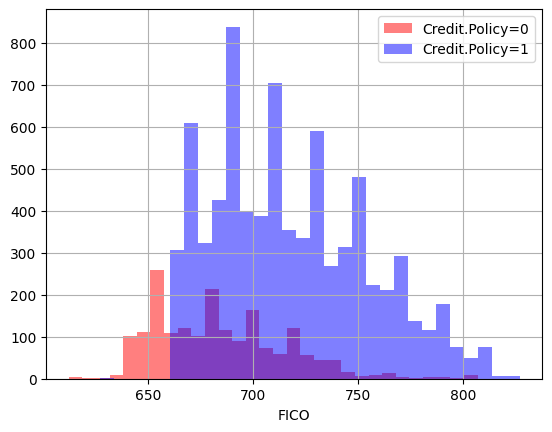

In [6]:
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, bins=30, color='red', label='Credit.Policy=0')
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5, bins=30, color='blue', label='Credit.Policy=1')

plt.legend()
plt.xlabel('FICO')

Same distributions, now analyzed over whether the borrower has returned the money in full or not.

Text(0.5, 0, 'FICO')

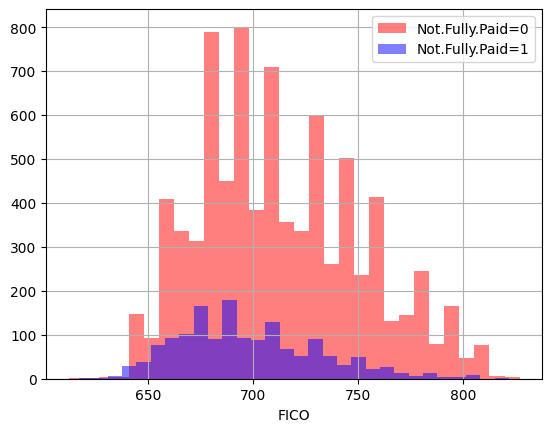

In [7]:
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, bins=30, color='red', label='Not.Fully.Paid=0')
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, bins=30, color='blue', label='Not.Fully.Paid=1')

plt.legend()
plt.xlabel('FICO')

**Analyzing for what borrowing purposes people have the most likelhihood of not returning the money in full, and vice-versa**

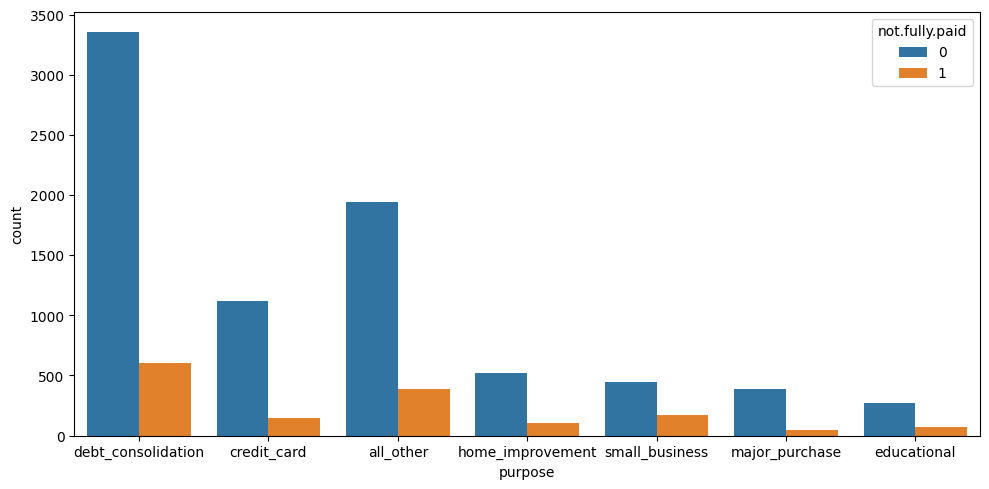

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.tight_layout()

FICO Score and Interest Rate relationship

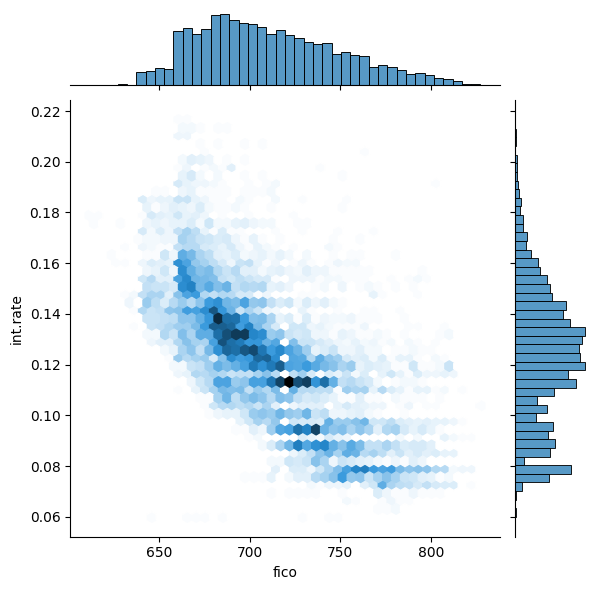

In [9]:
sns.jointplot(x='fico', y='int.rate', data=df, kind='hex')

**Analyzing the relationship between interest rates, credit scores, credit policy, and payment status.**

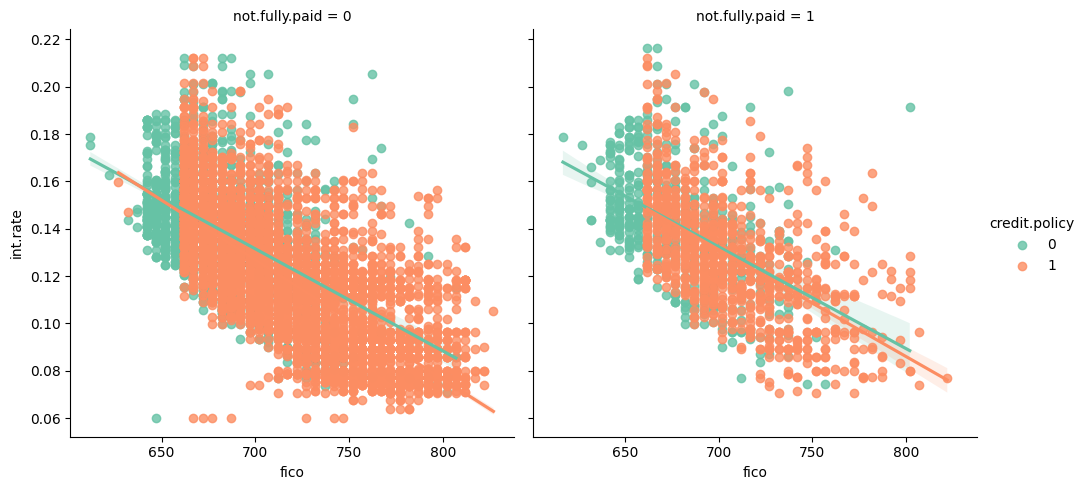

In [10]:
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid', palette='Set2')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

There is currently one categorical feature column in the data frame, as you can see from the info above as an `"object"` type

In [12]:
categorical_features = ['purpose']

**Getting dummy variables to convert purpose columns into discrete value**

In [13]:
final_df = pd.get_dummies(df,columns=categorical_features,drop_first=True)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split with Scikit-learn

Splitting the data into a 70/30 train/test pair of data sets


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_df.drop("not.fully.paid", axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree Model - Solution 1

In [17]:
from sklearn.tree import DecisionTreeClassifier

**Fitting the data in an instance of the DecisionTreeClassifier.**

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation - Decision Tree
**Using the test set to make predictions**

In [19]:
preds = dtc.predict(X_test)

**Using `sklearn.metrics` to evaluate the model**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2412
           1       0.23      0.22      0.22       462

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874



In [22]:
print(confusion_matrix(preds,y_test))

[[2061  351]
 [ 359  103]]


## Random Forest Model - Solution 2

**Creating an instance of the RandomForest Classifier with 100 estimators to fit to the training set**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation - Random Forest
**Using the test set to make predictions**

In [24]:
rfc_pred = rfc.predict(X_test)

**Using `sklearn.metrics` to evaluate the model performance**

In [25]:
print(confusion_matrix(y_test,rfc_pred))

[[2414    6]
 [ 447    7]]


In [26]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2420
           1       0.54      0.02      0.03       454

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.47      2874
weighted avg       0.80      0.84      0.77      2874



Note that the Random forest yielded a higher accuracy! 84% over 75%!